!pip install opencv-python

or 

!pip install opencv-contrib-python


In [2]:
import cv2
import os

# Face Detection

In [3]:
face_detector= cv2.CascadeClassifier(cv2.data.haarcascades +"haarcascade_frontalface_default.xml")

In [4]:
img = cv2.imread(r"C:\Users\Admin\Desktop\Sem 3\Deep Learning\computer vision\Irfan2.jpg")

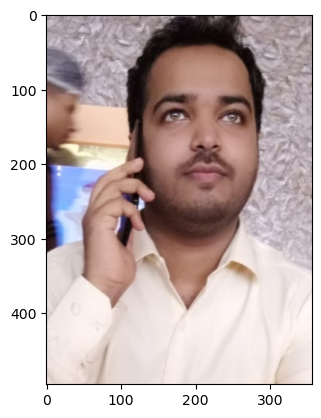

In [5]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

import matplotlib.pyplot as plt
#plt.figure(figsize=(10,10))
plt.imshow(img_rgb)

In [6]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_image

array([[194, 189, 183, ..., 159, 159, 158],
       [193, 190, 186, ..., 157, 156, 155],
       [194, 190, 184, ..., 155, 152, 150],
       ...,
       [226, 226, 227, ..., 236, 236, 236],
       [224, 224, 226, ..., 235, 235, 235],
       [223, 224, 226, ..., 234, 234, 235]], dtype=uint8)

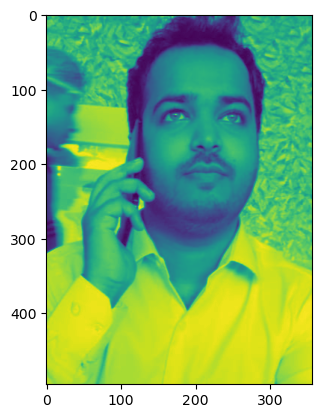

In [7]:
plt.imshow(gray_image)

* detectMultiScale This method only accepts grayscale pictures.
* scaleFactor – This tells how much the object’s size is reduced in each image.
* minNeighbors – This parameter tells how many neighbours each rectangle candidate should consider.
* minSize — This signifies the minimum possible size of an object to be detected. An object smaller than minSize would be ignored.

In [8]:
#Once cascade is loaded in OpenCV, we can call the detector function.
results = face_detector.detectMultiScale(gray_image, scaleFactor=1.05,minNeighbors=5, minSize=(40, 40))
results

array([[114,  55, 200, 200]])

In [9]:
for (x,y,w,h) in results:  # x,y plane ,w = width , h = height 
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),4)  #color= (255,0,0) , thickness = 4

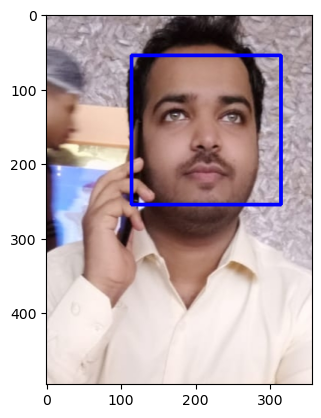

In [10]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

import matplotlib.pyplot as plt
#plt.figure(figsize=(10,10))
plt.imshow(img_rgb)

# Eye Detection

In [11]:
roi_gray = gray_image[y:y+h, x:x+w]#-----roi_gray is the cropped detected face in grayscale
roi_color = img[y:y+h, x:x+w]# --- roi_color is the cropped detected face in color

In [12]:
eye_detector = cv2.CascadeClassifier(os.path.join(cv2.data.haarcascades, 'haarcascade_eye.xml'))
eyes = eye_detector.detectMultiScale(roi_gray)
eyes

array([[113,  61,  45,  45],
       [ 61, 147,  25,  25],
       [ 31,  56,  49,  49]])

In [13]:
for (ex,ey,ew,eh) in eyes:
    cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

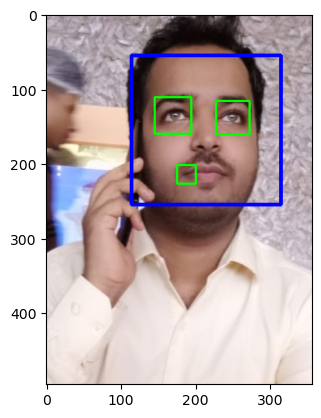

In [14]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

import matplotlib.pyplot as plt
#plt.figure(figsize=(10,10))
plt.imshow(img_rgb)

# Live

In [15]:
import cv2
face_detector= cv2.CascadeClassifier(cv2.data.haarcascades +"haarcascade_frontalface_default.xml")
eye_detector = cv2.CascadeClassifier(os.path.join(cv2.data.haarcascades, 'haarcascade_eye.xml'))
# reading the input image now
cap = cv2.VideoCapture(0) # Start camera
while cap.isOpened():
    _,frame = cap.read() # read image
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) # convert to gray colour 
    faces = face_detector.detectMultiScale(gray,1.1,4) # model 
    for (x,y, w, h) in faces:  # Rectangle in image  
        cv2.rectangle(frame, pt1 = (x,y),pt2 = (x+w, y+h), color = (255,0,0),thickness =  3)
    roi_gray = gray[y:y+h,x:x+w]  # cropped grey image 
    roi_color = frame[y:y+h, x:x+w] # Cropped color image 
    eyes = eye_detector.detectMultiScale(roi_gray) # model eye
    for (ex,ey, ew, eh) in eyes:# Rectangle in image
        cv2.rectangle(roi_color, (ex,ey), (ex+ew, ey+eh), (0,255,0), 5)
    cv2.imshow("window", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

frame.release()

AttributeError: 'numpy.ndarray' object has no attribute 'release'